# Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ML/toyota.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


# Обработка

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


*   model - модель тойоты
*   year - год выпуска
* price - цена в долларах
* transmission - тип трансмисии Automatic, Manual, Semi-Auto
* mileage - количество пройденных миль
* fuel_Type - тип топлива Petrol,Diesel,Hybrid,Electric,Other
* tax - ежегодный налог
* mpg - миль на галлон (км на литр)
* engineSize - размер двигателя

In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

##Удаляем дубликаты

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape) # Сколько таких строк
df = df.drop_duplicates()

number of duplicate rows:  (39, 9)


In [ ]:
df.count() # Сколько строк данных осталось

model           6699
year            6699
price           6699
transmission    6699
mileage         6699
fuelType        6699
tax             6699
mpg             6699
engineSize      6699
dtype: int64

## Удаление пропусков

In [ ]:
print(df.isnull().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [ ]:
df=df.dropna(axis=0,inplace=False)
print(df.isnull().sum()) # После удаления

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


## Замена категориальных переменных



Модель для нас неинформативна, поэтому удаляем

In [ ]:
df["model"].value_counts()

 Yaris            2117
 Aygo             1940
 Auris             709
 C-HR              479
 RAV4              467
 Corolla           265
 Prius             232
 Verso             114
 Avensis           114
 Hilux              85
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [ ]:
del df["model"]

In [ ]:
df["fuelType"].value_counts()

Petrol    4058
Hybrid    2040
Diesel     496
Other      105
Name: fuelType, dtype: int64

In [ ]:
fuel = {"fuelType":{"Petrol": 1, "Hybrid": 2,"Diesel":3, "Other":4}}
df=df.replace(fuel)
df['fuelType'] = df['fuelType'].astype(int)

In [ ]:
df["transmission"].value_counts()

Manual       3793
Automatic    2651
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

Other всего один, можно удалить

In [ ]:
df = df.loc[df['transmission'] != 'Other']

In [ ]:
transmission = {"transmission":{"Manual": 1, "Automatic": 2,"Semi-Auto":3}}
df=df.replace(transmission)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6698 non-null   int64  
 1   price         6698 non-null   int64  
 2   transmission  6698 non-null   int64  
 3   mileage       6698 non-null   int64  
 4   fuelType      6698 non-null   int64  
 5   tax           6698 non-null   int64  
 6   mpg           6698 non-null   float64
 7   engineSize    6698 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 471.0 KB


Нормализация минимаксная

In [ ]:
num_columns = ["year", "price", "transmission", "mileage", "fuelType", "tax", "mpg","engineSize"]
for col_i in num_columns:
    print(f"Range of {col_i}: [{df[col_i].min()} - {df[col_i].max()}]")

Range of year: [1998 - 2020]
Range of price: [850 - 59995]
Range of transmission: [1 - 3]
Range of mileage: [2 - 174419]
Range of fuelType: [1 - 4]
Range of tax: [0 - 565]
Range of mpg: [2.8 - 235.0]
Range of engineSize: [0.0 - 4.5]


# Визуализация

## Гистограммы

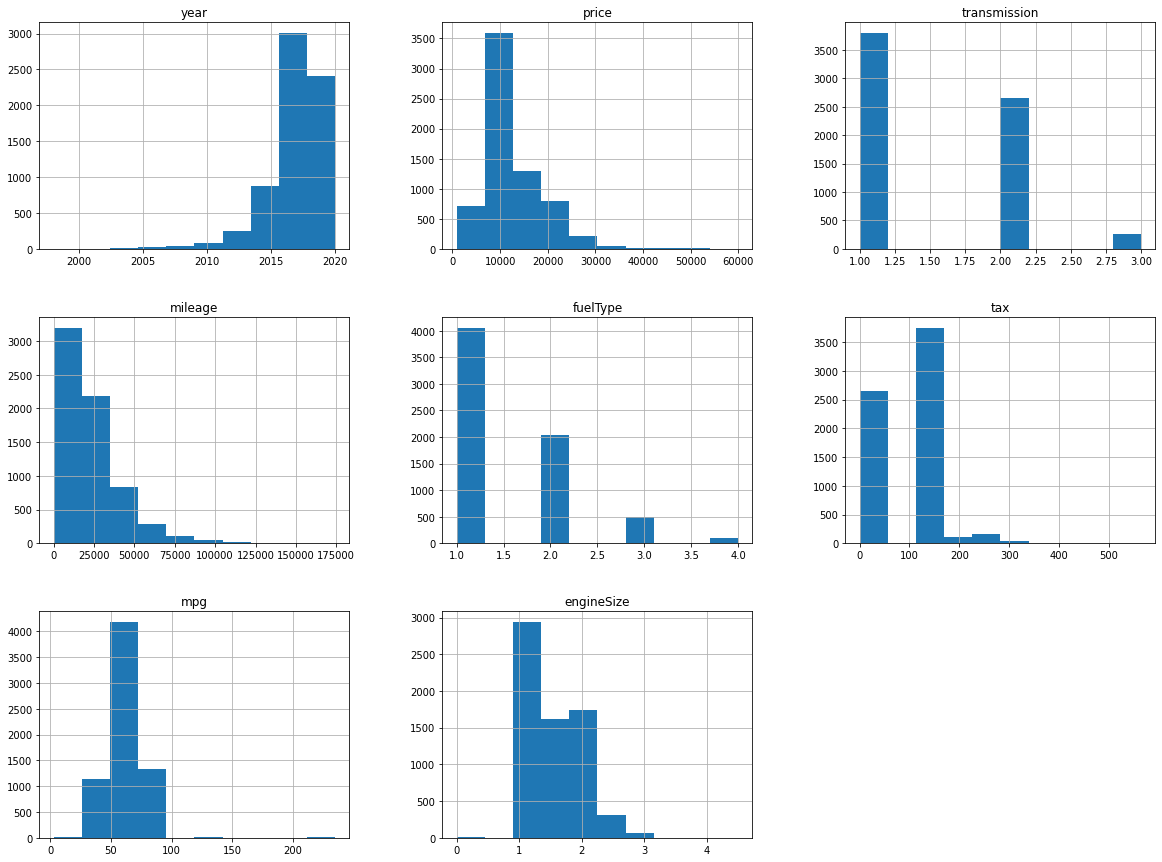

In [ ]:
df.hist(figsize=(20,15))
plt.show()

## Тепловая карта

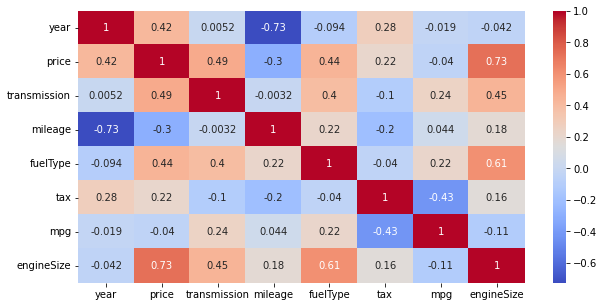

In [ ]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

## Диаграммы рассеяния

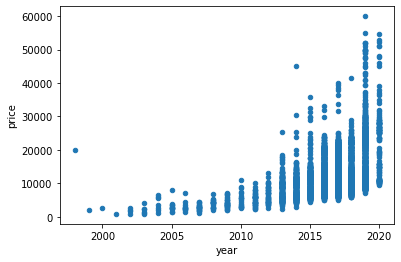

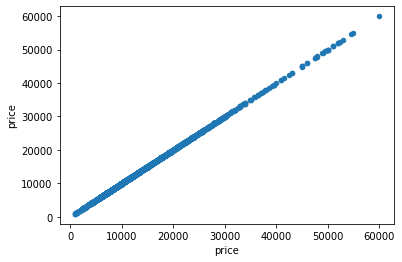

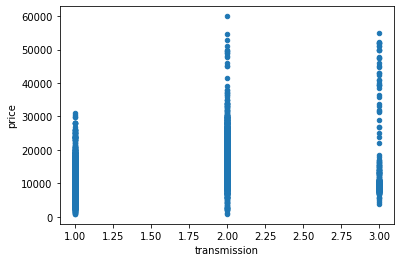

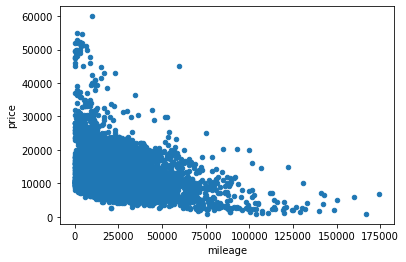

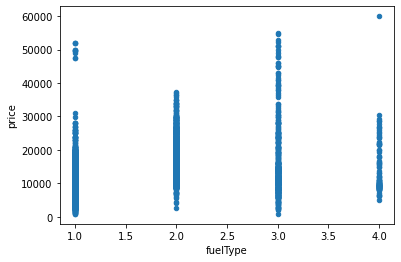

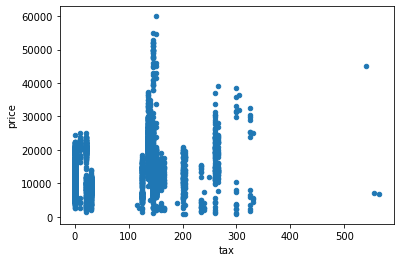

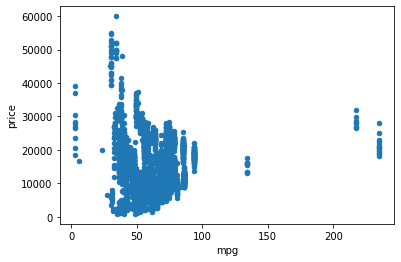

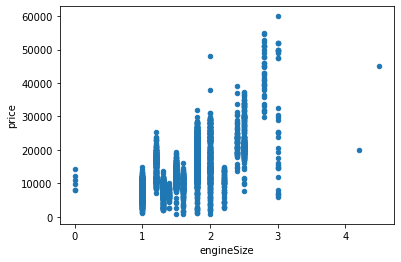

In [ ]:
num_columns = ["year", "price", "transmission", "mileage", "fuelType", "tax", "mpg","engineSize"]
response_var = "price"
for num_col_i in num_columns:
    df.plot.scatter(x=num_col_i, y=response_var)

# Регрессия

Импорт библиотек

In [ ]:
from sklearn.linear_model import SGDRegressor       # линейная регрессия с градиентным спуском
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Разделяем данные на выборки

In [ ]:
# X = df_nums.copy()
X = df.copy()
Y = X["price"].copy()
X_train, X_test = train_test_split(X, train_size = 0.7, test_size = 0.3, random_state = 42)
Y_train, Y_test = X_train["price"].copy(), X_test["price"].copy()
del X_train["price"]
del X_test["price"]
del X["price"]

Фукнция для подсчета ошибок и вывода графика

In [ ]:
def show_error(Y_test, Y_pred, plot_off = False) -> str:
    S = f"R2: {r2_score(Y_test, Y_pred)}\n"
    mse = mean_squared_error(Y_test, Y_pred)
    S += f"RMSE: {np.sqrt(mse)}\n"
    S += f"MSE: {mse}\n"
    S += f"MAE: {mean_absolute_error(Y_test, Y_pred)}\n"
    if(plot_off == False):
        fig,ax=plt.subplots(figsize=(10,10))
        sns.scatterplot(x=Y_test,y=Y_pred)
        plt.xlabel('Y_test', fontsize=10)
        plt.ylabel('Y_pred', fontsize=10)
    return S

## Линейная регрессия

R2: 0.7881597228467563
RMSE: 2948.630972020571
MSE: 8694424.609158978
MAE: 2117.104517513584



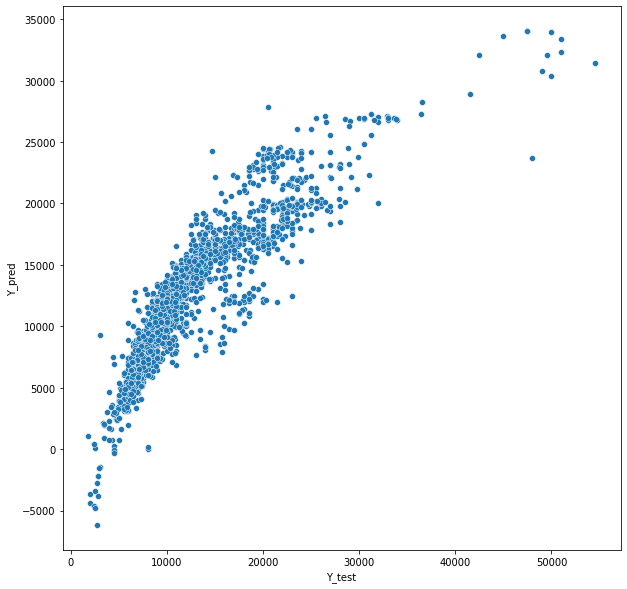

In [ ]:
models = []

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, Y_train)

Y_pred = lin.predict(X_test)
print(show_error(Y_test, Y_pred))

models.append(("LinearRegression", r2_score(Y_test, Y_pred)))

##Дерево решений

R2: 0.9307660948237676
RMSE: 1685.6816899110854
MSE: 2841522.7597014927
MAE: 1047.4074626865672



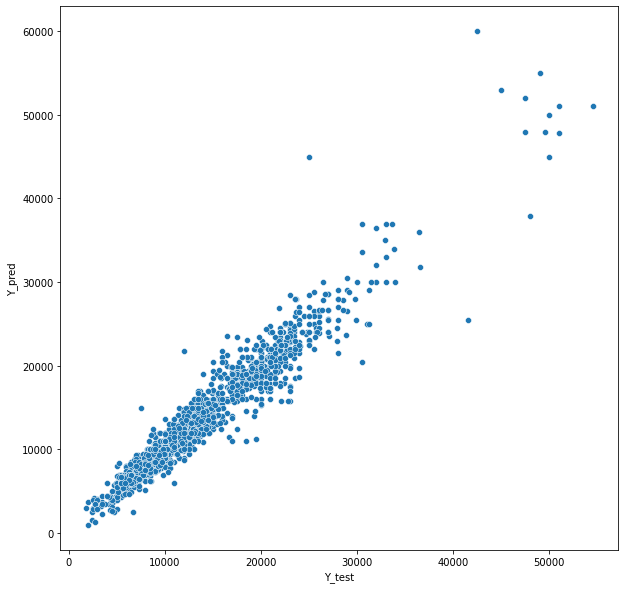

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

Y_pred = dtr.predict(X_test)
print(show_error(Y_test, Y_pred))

models.append(("DecisionTreeRegressor", r2_score(Y_test, Y_pred)))

##LASSO - L1

Обучим Lasso-регрессию с небольшим коэффициентом $\alpha$ (слабая регуляризация).

R2: 0.7881585677163403
RMSE: 2948.6390112110494
MSE: 8694472.018435676
MAE: 2117.077134723511



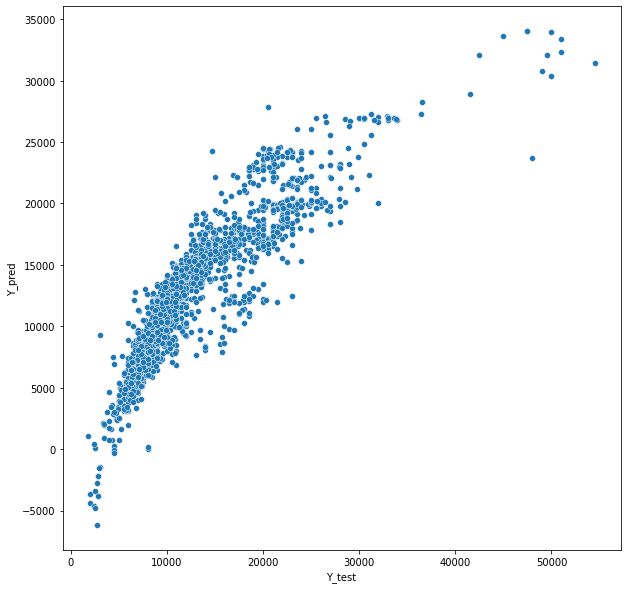

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

Y_pred = lasso.predict(X_test)
print(show_error(Y_test, Y_pred))

models.append(("Lasso", r2_score(Y_test, Y_pred)))

In [ ]:
lasso.coef_

array([ 8.81087230e+02,  1.91825771e+03, -6.64180569e-02,  3.29716290e+02,
       -5.52820639e-01, -8.09148380e+00,  9.83118544e+03])

Обучим Lasso-регрессию с большим коэффициентом $\alpha=10000$.

R2: 0.10486312920428098
RMSE: 6061.231590847893
MSE: 36738528.39789248
MAE: 4634.03601750298



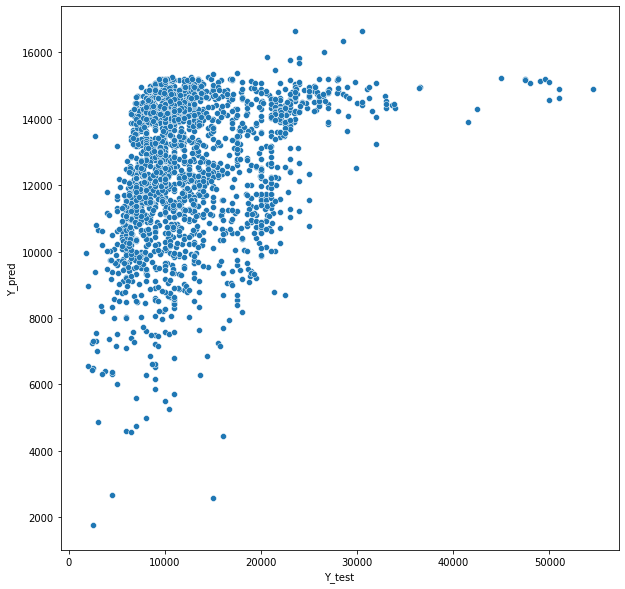

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10000)
lasso.fit(X_train, Y_train)

Y_pred = lasso.predict(X_test)
print(show_error(Y_test, Y_pred))

#models.append(("Lasso", r2_score(Y_test, Y_pred)))

In [ ]:
lasso.coef_

array([ 0.        ,  0.        , -0.09027754,  0.        , 12.59211015,
        0.        ,  0.        ])

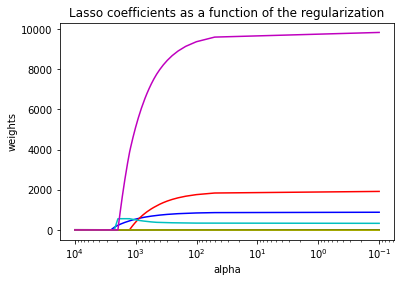

In [ ]:
from cycler import cycler

n_alphas = 200
alphas = np.linspace(0.1, 10000, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, Y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show();

## Ridge-регрессия L2

R2: 0.7881559197085808
RMSE: 2948.657440076682
MSE: 8694580.698919572
MAE: 2117.083315498318



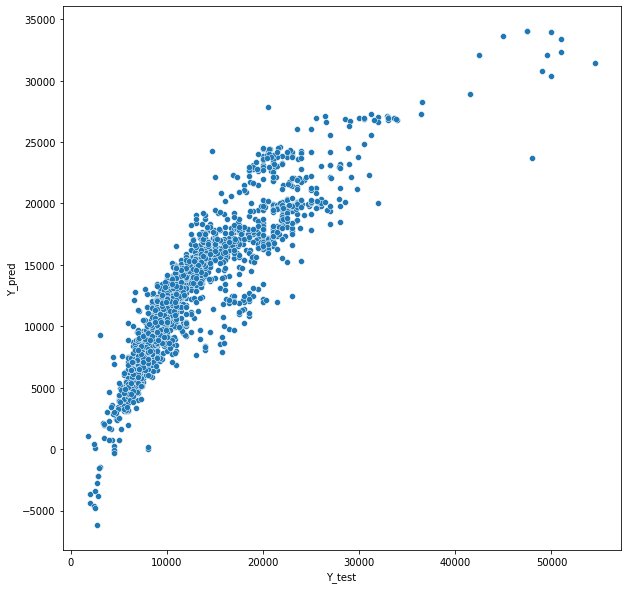

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)

Y_pred = ridge.predict(X_test)
print(show_error(Y_test, Y_pred))

models.append(("Ridge", r2_score(Y_test, Y_pred)))

В случае Ridge-регрессии никакие праметры не зануляются – они могут быть очень малыми, но не нулевыми.

In [ ]:
ridge.coef_

array([ 8.81145967e+02,  1.91878314e+03, -6.64105090e-02,  3.30399552e+02,
       -5.52254248e-01, -8.10792538e+00,  9.82951170e+03])

##XGBOOST

[06:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.9671036782820163
RMSE: 1161.956380745624
MSE: 1350142.6307554694
MAE: 775.1991226120375



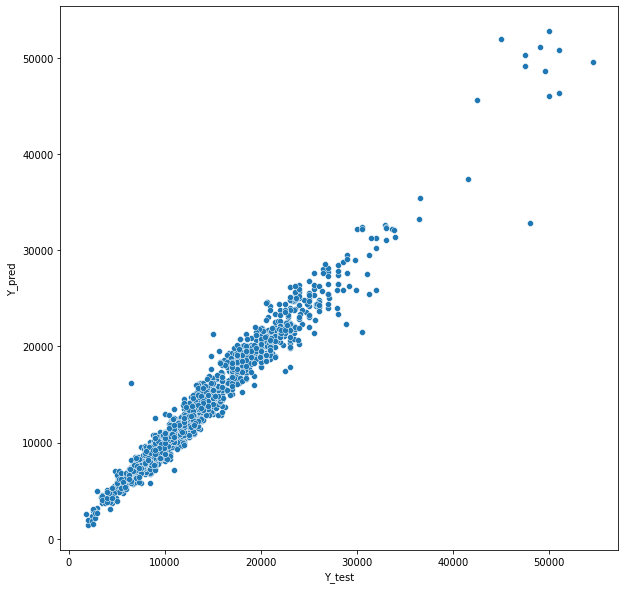

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=847)
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)
print(show_error(Y_test, Y_pred))

models.append(("XGBoost", r2_score(Y_test, Y_pred)))

##ElasticNet - L1+L2

R2: 0.6812294984981246
RMSE: 3617.0558768360647
MSE: 13083093.216154315
MAE: 2487.777654250315



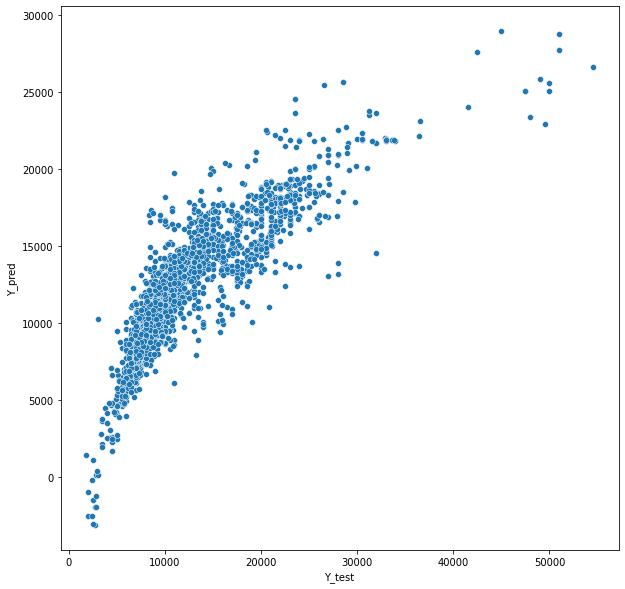

In [ ]:
from sklearn.linear_model import ElasticNet

a = 0.8
b = 0.2
elastic = ElasticNet(alpha=a+b, l1_ratio=a/(a+b))
elastic.fit(X_train,Y_train)
Y_pred = elastic.predict(X_test)
print(show_error(Y_test, Y_pred))

models.append(("ElasticNet", r2_score(Y_test, Y_pred)))

# Итоги

Точность = величина дисперсии, которую может объяснить метод (или r2_score)

LinearRegression: 0.79
DecisionTreeRegressor: 0.93
Lasso: 0.79
Ridge: 0.79
XGBoost: 0.97
ElasticNet: 0.68


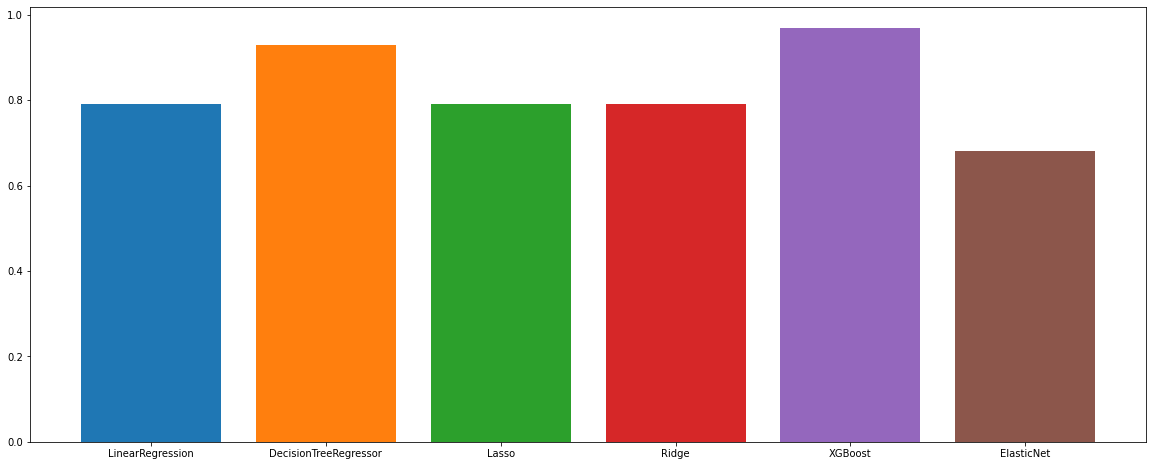

In [ ]:
for model, r2 in models:
    r2_round = round(r2, 2)

    print(f"{model}: {r2_round}")
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(model, r2_round)